# Loudness and envelope descriptors

In this example we compute a few features that can be used to describe the envelope and loudness of an audio signal. Essentia contains algorithms for basic loudness computation as well as the most up-to-date loudness standard in broadcasting, [EBU R 128](https://en.wikipedia.org/wiki/EBU_R_128).

In [ ]:

filename = '../../../test/audio/recorded/techno_loop.wav'
import IPython
IPython.display.Audio(filename)

In [1]:
from google.colab import drive

# 连接Google云盘，此步骤只需执行一次
drive.mount('/content/drive')
# Plots
!pip install essentia
import essentia
import essentia.standard as es

# Plots
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import plot, show, figure, imshow
plt.rcParams['figure.figsize'] = (15, 6) # Set plot sizes to something larger than default

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 19.0 MB/s eta 0:00:00


## Envelope, RMS, high-frequency content

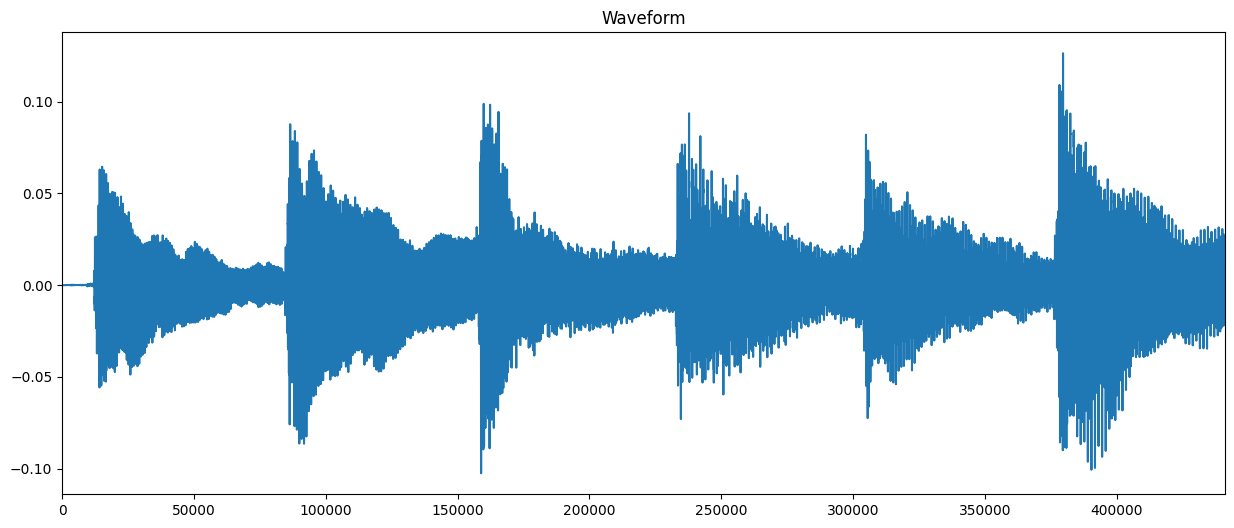

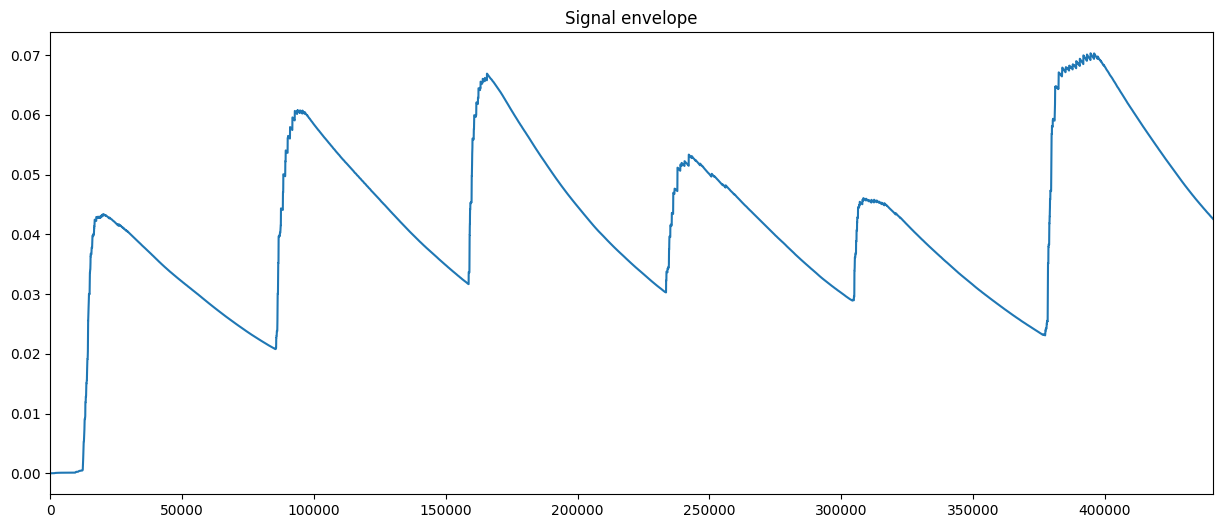

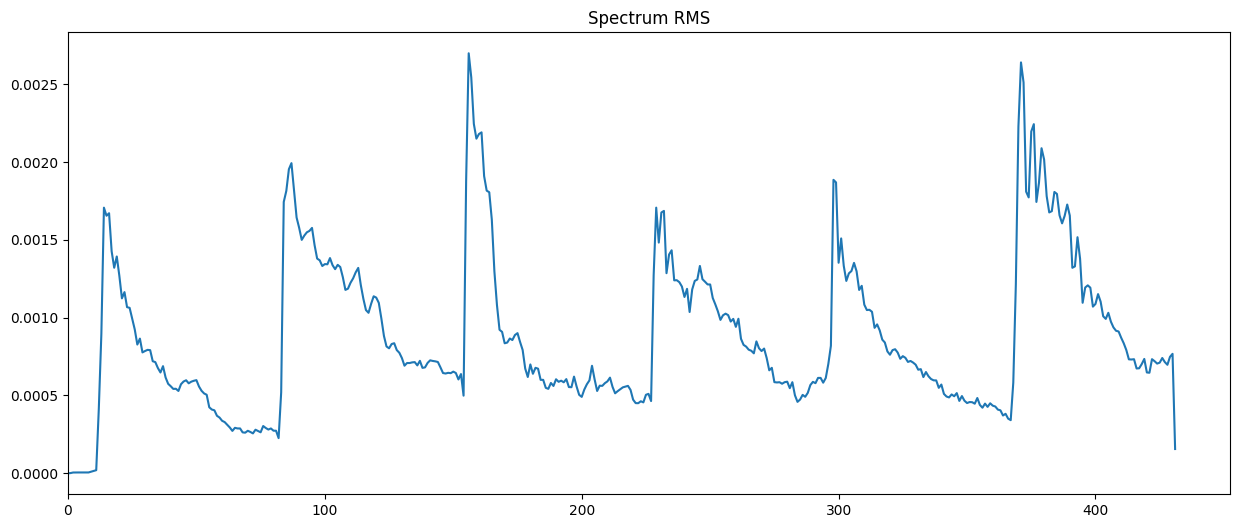

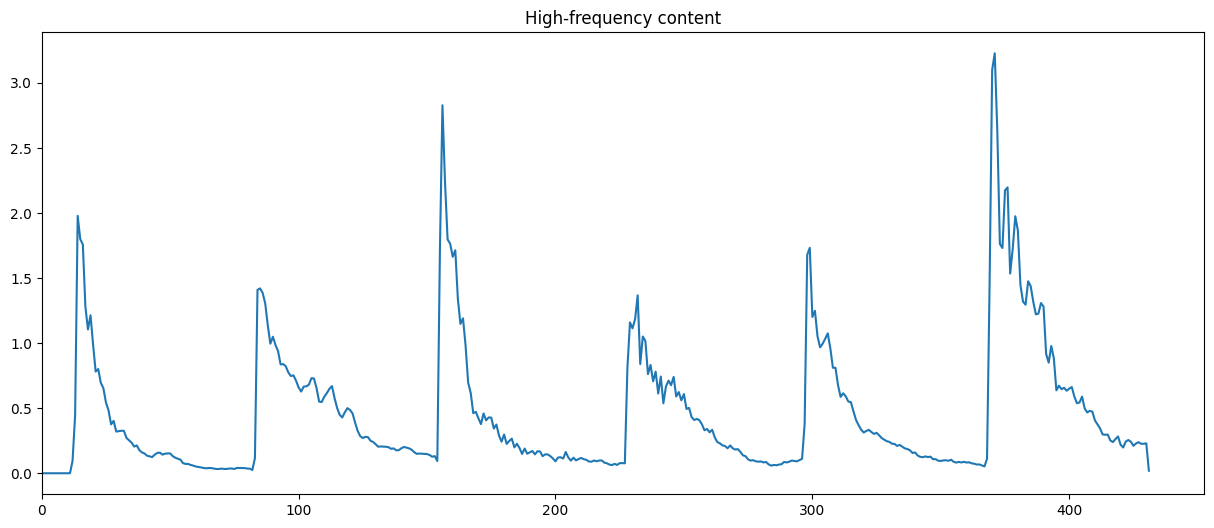

In [2]:
# Let's load only the first 10 second of audio

filename = '/content/drive/MyDrive/recsys/卡农变奏曲舒缓悠扬轻音乐钢琴伴奏背景配乐_爱给网_aigei_com.mp3'
SEGMENT_LENGTH = 10
audio = es.EasyLoader(filename=filename, startTime=0, endTime=SEGMENT_LENGTH)()
pool = essentia.Pool()

windowing = es.Windowing(type='blackmanharris62', zeroPadding=2048)
spectrum = es.Spectrum()

rms = es.RMS()
hfc = es.HFC()

for frame in es.FrameGenerator(audio, frameSize=2048, hopSize=1024):
    frame_spectrum = spectrum(windowing(frame))

    pool.add('rms', rms(frame))
    pool.add('rms_spectrum', rms(frame_spectrum))
    pool.add('hfc', hfc(frame_spectrum))

plot(audio)
plt.xlim(0, 44100 * SEGMENT_LENGTH)
plt.title("Waveform")
show()

envelope = es.Envelope()
plot(envelope(audio))
plt.xlim(0, 44100 * SEGMENT_LENGTH)
plt.title("Signal envelope")
show()

plot(pool['rms'])
plt.title("RMS")
plt.xlim(0)
show()

plot(pool['rms_spectrum'])
plt.title("Spectrum RMS")
plt.xlim(0)
show()

plot(pool['hfc'])
plt.title("High-frequency content")
plt.xlim(0)
show()

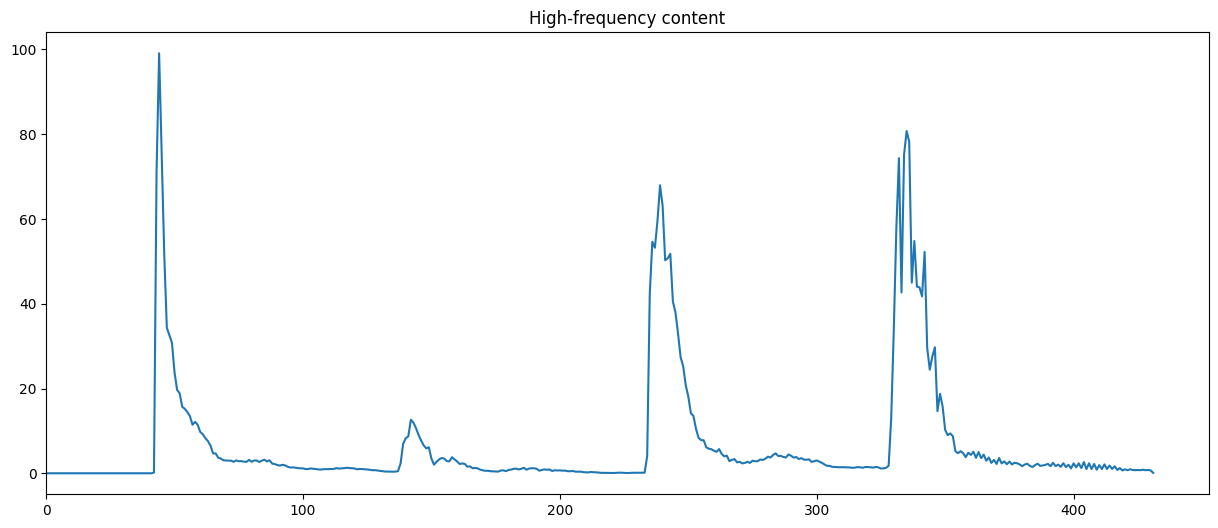

In [3]:
filename = '/content/drive/MyDrive/recsys/明日之火 - 卡农 钢琴版.mp3'
SEGMENT_LENGTH = 10
audio = es.EasyLoader(filename=filename, startTime=0, endTime=SEGMENT_LENGTH)()
pool = essentia.Pool()

windowing = es.Windowing(type='blackmanharris62', zeroPadding=2048)
spectrum = es.Spectrum()

rms = es.RMS()
hfc = es.HFC()

for frame in es.FrameGenerator(audio, frameSize=2048, hopSize=1024):
    frame_spectrum = spectrum(windowing(frame))

    pool.add('rms', rms(frame))
    pool.add('rms_spectrum', rms(frame_spectrum))
    pool.add('hfc', hfc(frame_spectrum))

plot(audio)
plt.xlim(0, 44100 * SEGMENT_LENGTH)
plt.title("Waveform")
show()

envelope = es.Envelope()
plot(envelope(audio))
plt.xlim(0, 44100 * SEGMENT_LENGTH)
plt.title("Signal envelope")
show()

plot(pool['rms'])
plt.title("RMS")
plt.xlim(0)
show()

plot(pool['rms_spectrum'])
plt.title("Spectrum RMS")
plt.xlim(0)
show()

plot(pool['hfc'])
plt.title("High-frequency content")
plt.xlim(0)
show()

## EBU R128 loudness
Essentia provides the [LoudnessEBUR128](https://essentia.upf.edu/documentation/reference/std_LoudnessEBUR128.html) algorithm which implements a [common standard in broadcasting](https://en.wikipedia.org/wiki/EBU_R_128). It allows estimating overall loudness and its momentary and short-term fluctuations and dynamic range.

In [4]:
# LoudnessEBUR128 requires stereo in 44100 Hz sample rate
filename = '/content/drive/MyDrive/recsys/卡农变奏曲舒缓悠扬轻音乐钢琴伴奏背景配乐_爱给网_aigei_com.mp3'
audio_st, _, _, _, _, _ = es.AudioLoader(filename=filename)()
audio_st = es.StereoTrimmer(startTime=0, endTime=SEGMENT_LENGTH)(audio_st)
ebu_momentary, ebu_shortterm, ebu_integrated, dr = es.LoudnessEBUR128(hopSize=1024/44100, startAtZero=True)(audio_st)

plot(ebu_momentary)
plot(ebu_shortterm)
plt.title("EBU R128 momentary and short-term loudness")
plt.xlim(0)
show()

In [5]:
# LoudnessEBUR128 requires stereo in 44100 Hz sample rate
filename = '/content/drive/MyDrive/recsys/明日之火 - 卡农 钢琴版.mp3'
audio_st, _, _, _, _, _ = es.AudioLoader(filename=filename)()
audio_st = es.StereoTrimmer(startTime=0, endTime=SEGMENT_LENGTH)(audio_st)
ebu_momentary, ebu_shortterm, ebu_integrated, dr = es.LoudnessEBUR128(hopSize=1024/44100, startAtZero=True)(audio_st)

plot(ebu_momentary)
plot(ebu_shortterm)
plt.title("EBU R128 momentary and short-term loudness")
plt.xlim(0)
show()

In [ ]:
print("Integrated loudness:", ebu_integrated)
print("Dynamic range:", dr)

Integrated loudness: -13.052407264709473
Dynamic range: 2.255620002746582
